# Final Project - Milestone 1

## Serena Gestring - 4/6/25

For my project, I was able to acquire five different csv files with different web analytics data for the Kent State LGBTQ+ Center website (https://www.kent.edu/lgbtq). Four of these files were downloaded directly from the university's Google Analytics account, and the fifth file was sent to me by the Executive Director of Digital Communications within UCM Operations (I think because that data is housed in a system that I cannot be given access to like I was with Google Analytics). The Executive Director also gave me specific instructions on how to correctly download the data I needed for my center's website.

The data contained within each of the five data files were collected over the course of one year, specifically between March 9, 2024 and March 9, 2025. This is because the Executive Director who sent me the non-Google Analytics file input those dates into the external system for data retrieval. I did not ask for those particular dates, but they are very close to being within the past year (the day I received the data was March 18, 2025), so I decided not to ask for different dates. Because of this, when I went to download the Google Analytics data I set the date range in that system to March 9, 2024 through March 9, 2025 so that all of my data covers the same year-long timeframe. 

A more thorough discussion of my data sources and data quality is provided in this Milestone's reflection (located in the README.md file in my final project repository).  

### Import Pandas and Data Visualization Modules

To start I imported the pandas module, as well as matplotlib and seaborn so I can quickly start experimenting with different data visualizations.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Device Category

The first data file has to do with the variety of devices that were used to access the LGBTQ+ Center website during the 12 month time frame. I don't need to use df.head() for this file because there are only four total rows included, meaning that there were only four different types of devices used. Also, I was fortunate that this data is already tidy; each row/observation is a type of device and each column/variable is a measureable aspect of that device type's usage.  

In [2]:
device = pd.read_csv('device_category.csv')
device

,Device category,Sessions,Engaged sessions,Engagement rate
0,mobile,28084,17311,0.616401
1,desktop,23108,15743,0.681279
2,tablet,734,447,0.608992
3,smart tv,2,1,0.500000


Again, since I am not familiar with Google Analytics, I had to do some research in order to better understand this data. According to the [Analytics Help website](https://support.google.com/analytics/answer/12195621?hl=en) (by Google), a Session just means "a period during which a user is engaged with your website or app." However, an Engaged Session is a session that meets at least one of the following criteria: "lasts longer than 10 seconds; has a key event; has 2 or more screen or page views." Therefore, the Engagement Rate is "the percentage of engaged sessions on your website or mobile app." So a higher percentage means more sessions of meaningful engagement and a lower percentage means less sessions of meaningful engagement. I higher engagement rate means more people are actively engaging in our content in a meaningful way, rather than passive engagement. 

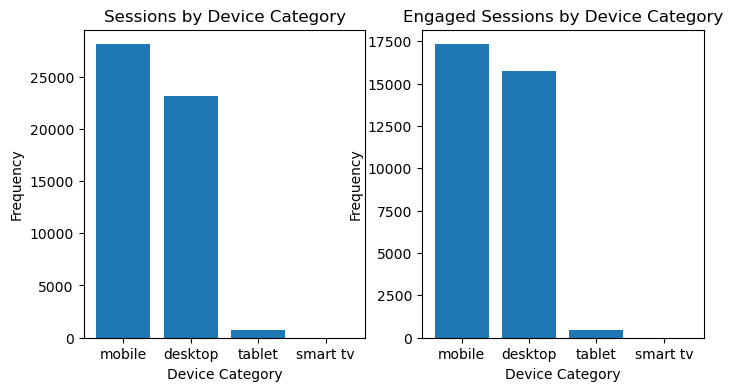

In [3]:
fig1, axs1 = plt.subplots(1, 2, figsize = (8, 4))

axs1[0].bar(device['Device category'], device['Sessions'])
axs1[0].set_title('Sessions by Device Category')
axs1[0].set_xlabel('Device Category')
axs1[0].set_ylabel('Frequency')

axs1[1].bar(device['Device category'], device['Engaged sessions'])
axs1[1].set_title('Engaged Sessions by Device Category')
axs1[1].set_xlabel('Device Category')
axs1[1].set_ylabel('Frequency')

plt.show()

The device category DataFrame is honestly small enough that I personally don't really need a graph to see how each category compares across sessions, engaged sessions, and engagement rate, but I created a bar plot for the first two variables anyway. This is actually a bad graph in its current form because the y-axes are labeled/scaled differently in a way that makes it look like sessions and engaged sessions across devices are actually fairly similar, when that is not actually the case if you pay attention to the numbers themselves. I am sure there is a way to fix that so the y-axes are equal in presentation and so the bar heights would be truly representative.

While this data would be useful for understanding our user behavior in general, such as what types of devices they tend to be more engaged with, that is outside the scope of my driving question for this project. Therefore, because this data does not help me identify specific content users have engaged in, it does not make sense for me to further pursue this data in my final project (and so there is no reason for me to improve this graph since it will not be shown to my audience).

### Traffic Acquisition

My next data file has to do with traffic acquisition, which is basically how users find and access our center's website (e.g., a search engine, a link on another website, an email campaign or signature, directly typing in the URL, etc.). Similar to the first data file, this includes Sessions, Engaged Sessions, and Engagement Rate as variables, and that data looks tidy. However, the first column "Session source / medium" confuses me. It looks like those should be two separate variables to me; I wonder if there is a specific reason Google Analytics put them together. 

According to the [Analytics Help website](https://support.google.com/analytics/answer/12923437?hl=en&co=GENIE.Platform%3DDesktop&oco=0), "Session source" means "A representation of the publisher or inventory source from which traffic originated;" "Session medium" means "The method for acquiring users in a new session;" and "Session source / medium" is "The source and medium associated with a new session." So it seems like "Session source / medium" is an established metric in Google Analytics that happened to be collected in the report template I used, but personally I would think it would be tidier to have them as separate columns. 

In [4]:
traffic = pd.read_csv('traffic_acquisition.csv')
traffic.head()

,Session source / medium,Sessions,Engaged sessions,Engagement rate
0,google / organic,42038,28279,0.672701
1,(direct) / (none),5484,2491,0.454230
2,bing / organic,941,737,0.783209
3,slate / email,454,317,0.698238
4,login.microsoftonline.com / referral,366,326,0.890710


In [5]:
traffic.shape

(249, 4)

Based on the shape of this DataFrame, it looks like there are 249 observations, which means there are 249 unique "Session source / medium" combinations. I don't need to create the graph to know a bar plot with 249 categories on the x-axis would not look good. I think one way to address this would be to combine the similar session sources into broader categories and display those reduced categories in one graph, or to create one graph per category so you could still see the specific session sources in each category. Again, I think that would be easier if session and medium were two separate columns. Then you could also look at just medium types or just source types. 

Regardless, the goal of traffic acquisition is to determine where your website's users came from before visiting your site, which could help with things like promotion and marketing and where you should consider targeting your efforts. However, this does not relate to my project's driving question because it does not provide any insight into *where* on our website our users have visited, just that they've made it to our website from different places. Since this data is not useful for my driving question, I will not be pursuing it any further for this project.  

### Scroll Depth

My next data file has to do with scroll depth, which measures how far a user has scrolled down a webpage (e.g. 50% down a page, 75% down a page, or 100% down the page). This DataFrame also seems to be already tidy; each row/observation is a unique URL, and the columns represent different variables associated with each URL. 

What's interesting about this DataFrame is that it includes a "Pageviews" metric rather than a "Sessions" metric. Recall that a Session means "a period during which a user is engaged with your website or app." According to the [Analytics Help website](https://support.google.com/analytics/answer/1257084?hl=en#zippy=%2Cin-this-article), a pageview is "a view of a page on your site that is being tracked by the Analytics tracking code." I  believe this means that a user could view an individual webpage multiple times during one session, so it makes sense that Pageviews and Sessions may be different for the same webpage/URL (as seen in the next data file, Sessions and Engagement). 

In [6]:
scroll = pd.read_csv('scroll_depth.csv')
scroll.head()

,Segment,Pageviews,50 Percent,75 Percent,100 Percent
0,/lgbtq/common-ally-questions,14250,3726,2172,243
1,/lgbtq/symbols-ace-spectrum,8464,5899,3165,281
2,/lgbtq/pros-and-cons-being-ally,5281,3240,2116,281
3,/lgbtq,4625,2303,1891,693
4,/lgbtq/frequently-asked-questions-faq,2977,1161,786,131


In [7]:
scroll.shape

(163, 5)

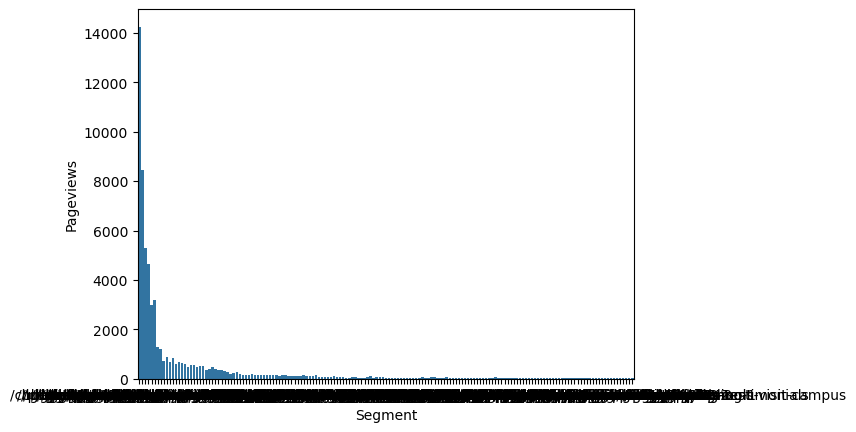

In [8]:
sns.barplot(scroll, x = 'Segment', y = 'Pageviews')
plt.show()

Obviously the graph above is bad and ugly. 163 is way too many rows to plot on one barplot, but it is clear that most of these URLS do not have very many pageviews. I think it would make sense to cut off every URL that has less than 2000 pageviews and see how our graph looks after that change.

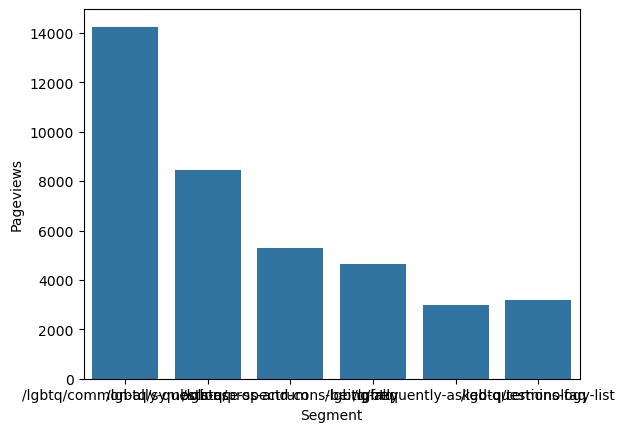

In [9]:
sns.barplot(scroll[scroll['Pageviews'] > 2000], x = 'Segment', y = 'Pageviews')
plt.show()

While this does look better (though the labels would need cleaned up), now this only leaves me with 6 URLs, so let's try every URL above 1000 rather than 2000 pageviews. 

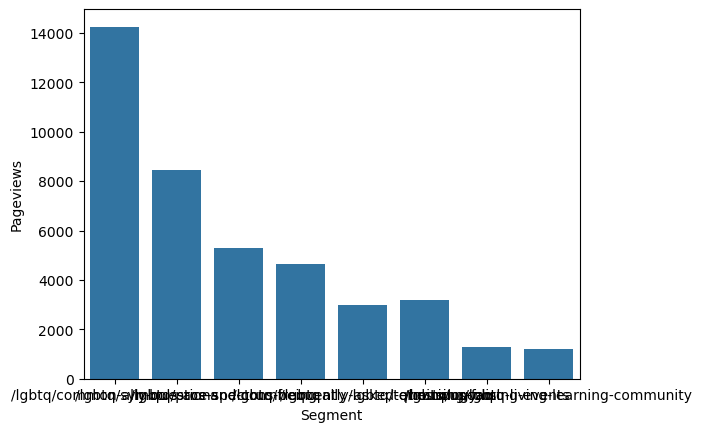

In [10]:
sns.barplot(scroll[scroll['Pageviews'] > 1000], x = 'Segment', y = 'Pageviews')
plt.show()

And that gives me 8 URLs. Let's try 600 just to see what that gives me.

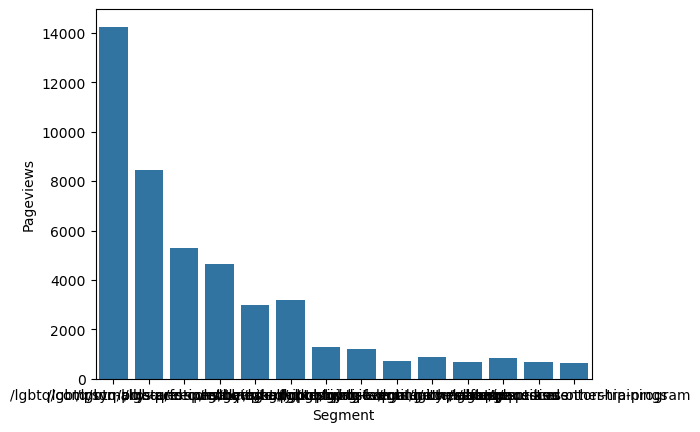

In [11]:
sns.barplot(scroll[scroll['Pageviews'] > 600], x = 'Segment', y = 'Pageviews')
plt.show()

And this gives me 14 URLs. I definitely would not want any more rows than this, especially since it is looks like around 600 is where pageviews start to plateau, so anything under 600 pageviews is not being utilized as much and so is not really worth my consideration. Obviously if I were to move forward with this graph the x-axis labels need dealth with, but right now I am not going to worry about it. 

But do I want to consider the number of pageviews alone? Should I instead consider the URLs by how many of their pageviews had 100% scroll depth (meaning those are the number of pageviews where users scrolled through the entire page rather than only part of the page)? 

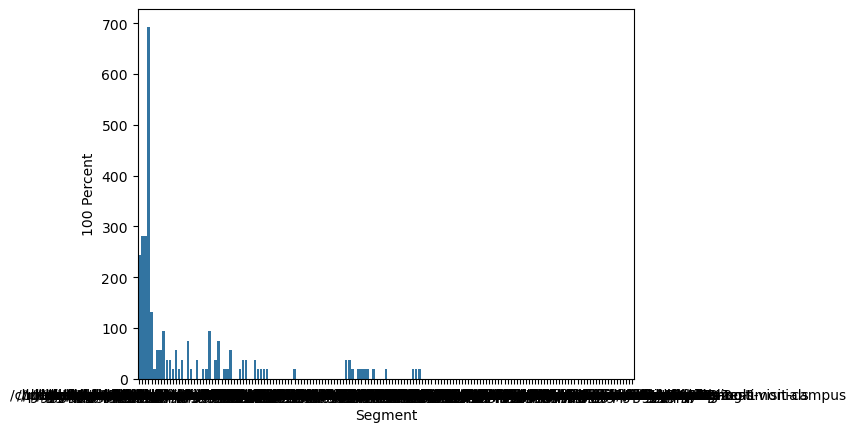

In [12]:
sns.barplot(scroll, x = 'Segment', y = '100 Percent')
plt.show()

It doesn't look like there are that many URLs with pageviews of 100 Percent scroll depth over 100, but I want to see what that looks like filtered out.

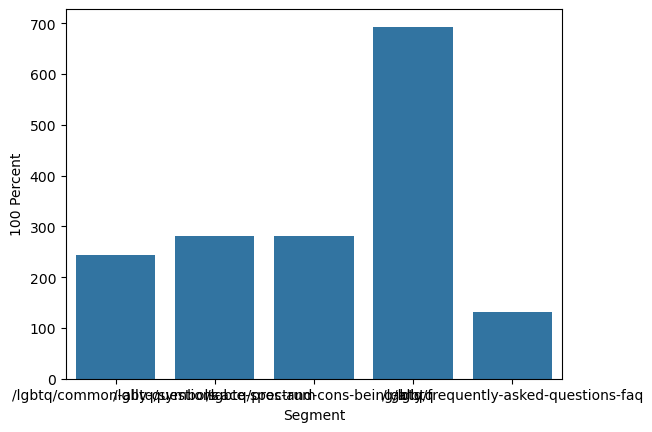

In [13]:
sns.barplot(scroll[scroll['100 Percent'] > 100], x = 'Segment', y = '100 Percent')
plt.show()

And there's only 5 URLs with 100 or more pageviews at 100 Percent scroll depth. Let's try 50.

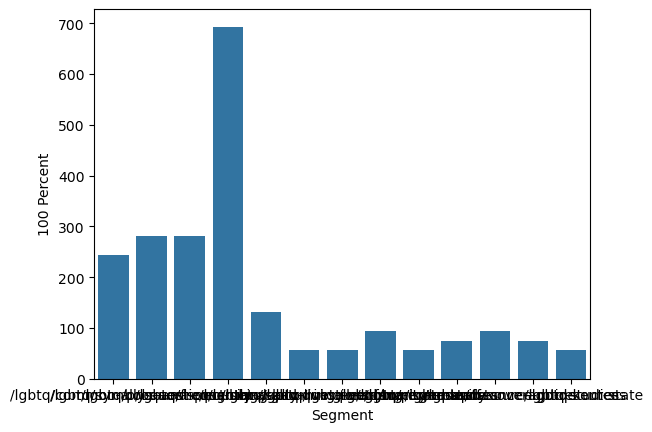

In [14]:
sns.barplot(scroll[scroll['100 Percent'] > 50], x = 'Segment', y = '100 Percent')
plt.show()

And that gives me 13 URLs. I wonder how many of those URLs match the URLs from the initial pageviews graph. 

In [15]:
p = scroll[scroll['Pageviews'] > 600]
p

,Segment,Pageviews,50 Percent,75 Percent,100 Percent
0,/lgbtq/common-ally-questions,14250,3726,2172,243
1,/lgbtq/symbols-ace-spectrum,8464,5899,3165,281
2,/lgbtq/pros-and-cons-being-ally,5281,3240,2116,281
3,/lgbtq,4625,2303,1891,693
4,/lgbtq/frequently-asked-questions-faq,2977,1161,786,131
5,/lgbtq/terminology-list,3202,487,300,19
6,/lgbtq/upcoming-events,1292,974,637,56
7,/housing/lgbtq-living-learning-community,1198,992,412,56
8,/lgbtq/lgbtq-community-resources,712,599,318,94
9,/lgbtq/ohio-legal-name-change-process,880,412,281,37


In [16]:
o = scroll[scroll['100 Percent'] > 50]
o

,Segment,Pageviews,50 Percent,75 Percent,100 Percent
0,/lgbtq/common-ally-questions,14250,3726,2172,243
1,/lgbtq/symbols-ace-spectrum,8464,5899,3165,281
2,/lgbtq/pros-and-cons-being-ally,5281,3240,2116,281
3,/lgbtq,4625,2303,1891,693
4,/lgbtq/frequently-asked-questions-faq,2977,1161,786,131
6,/lgbtq/upcoming-events,1292,974,637,56
7,/housing/lgbtq-living-learning-community,1198,992,412,56
8,/lgbtq/lgbtq-community-resources,712,599,318,94
12,/lgbtq/center-staff,580,449,356,56
16,/lgbtq/transgender-resource-guide,487,449,300,75


Well, rows 0-4 and 6-8 appear in both lists, so that gives me 8 URLs that each have some of the most pageviews overall and the most pageviews that had 100% scroll depth. Perhaps those are potential contenders for those pages' contents being preserved, but to be clear I am not making any conclusions at this point. I also would need to do some additional experimentation to figure out the best way to visualize this data if I choose to move forward with this story. 

At this point, I also want to mention that when it is time to start making some conclusions and determining what my reccommendations will be, I can't only look at the numbers themselves. I have to also understand what the content is of an individual page in order to determine if it is something that should be preserved in the context of the larger situation. 

For example, row 6 contains the URL "/lgbtq/upcoming-events" which is our Upcoming Events page (lists our center's events during the current semester). This URL has over 1000 total pageviews and 56 of those pageviews have a 100% scroll depth. The numbers by themselves may indicate that this page is engaged with more frequently by users and so should be considered for preservation. However, the greater context is that these reccommendations are being made in the event our center closes and our website shuts down. If our center were to close, there would be no more upcoming events, and so it does not make sense to preserve that page's content and migrate it to a different website because the content would be outdated/irrelevant.    

Therefore, for each URL that has the potential to be reccommended for preservation based on the data, I need to consider what the actual content of that webpage is and if it even makes sense to preserve and migrate it somewhere else given the context of our center being closed. 

It is also important for me to take a closer look at these webpages because I have noticed that some of them actually are not from our center's website. For example, row 7 is the URL "/housing/lgbtq-living-learning-community" and appears in both lists. However, that is a webpage on the university housing website, not the LGBTQ+ Center's website. I think filtering "/lgbtq" in the Google Analytics report template included every URL with /lgbtq anywhere in the URL, not just after the kent.edu part of the URL (e.g., only URLs with "kent.edu/lgbtq"). So that means I also need to be aware if a potential reccommendation is even a page on our website. 

Overall, right now I think this data file was some potential and contains information that is relevant to helping answer my driving question, but before I make any final decisions on how to move forward, I want to finish exploring my last two data files first. 

### Sessions and Engagement

This next data file also contains unique URLs as the observational unit but this time the variables relate to sessions and engagement, similar to the first data file. Right away I am definitely interested in this particular data file because this was the one out of the five that I initially guessed would be the most relevant for my driving question since it literally has to do with how users are engaging on each page of our website. 

This data file also includes an "Average session duration" variable, which I believe is an average length of time for each session that involved the unique URL. I don't think this variable would be particularly helpful because having a long average session time does not tell me if the users were actually engaged with the content in a meaningful way during that time. A lot of people will visit a website and then become distracted, especially if they have multiple tabs open, so I don't think this metric will really help me figure out what URLs are most valuable to my users the way I suspect the other metrics can. Therefore I think looking at the "Engaged sessions" and "Engagement rate" metrics will be the most useful for my driving question. 

In [17]:
se = pd.read_csv('sessions_and_engagement.csv')
se.head()

,Page path and screen class,Sessions,Engaged sessions,Engagement rate,Average session duration
0,/lgbtq/common-ally-questions,14036,7999,0.569892,127.438253
1,/lgbtq/symbols-ace-spectrum,8480,5585,0.658608,62.766498
2,/lgbtq/pros-and-cons-being-ally,5093,3281,0.644218,138.905469
3,/lgbtq,4441,3687,0.830218,151.891271
4,/lgbtq/terminology-list,3359,2422,0.721048,104.620323


In [18]:
se.shape

(359, 5)

Looking at the shape of this DataFrame, it has 359 rows, which means 359 unique URLs. This is interesting because the scroll depth DataFrame only had 163 rows of unique URLs. I don't know why that would be, but I am going to guess that the URLs with the highest number of engaged sessions are going to be similar to those with the most pageviews. So I am not super worried about it because I am going to guess I would be dropping most if not all of those extra rows anyway, but I am curious why that discrepancy exists.

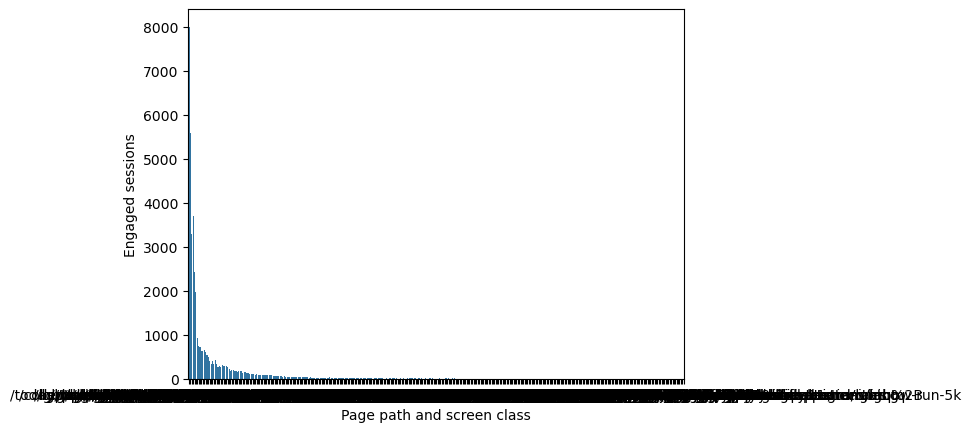

In [19]:
sns.barplot(se, x = 'Page path and screen class', y = 'Engaged sessions')
plt.show()

Yeah it looks like most of these URLs are not going to make the cut anyway. Let's see what I get for every URL above 500 engaged sessions.

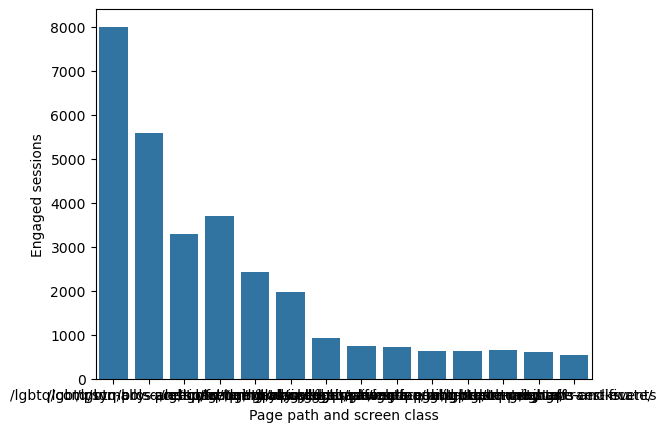

In [20]:
sns.barplot(se[se['Engaged sessions'] > 500], x = 'Page path and screen class', y = 'Engaged sessions')
plt.show()

And I get 14 URLs. It looks like around 500 engaged sessions is also where they start to plataeu, so I definitely don't want to include more than this. I also want to look at "Engagement rate" because that metric will give me an idea of the percentage of users being engaged versus how many users altogether are visiting each URL. For example, a webapge might have a high number of engaged sessions, but if the engagement rate is low, that means overall the users visiting that page are not meaningfully engaging in that page's content. So I don't want to only consider the number of engaged sessions per URL. 

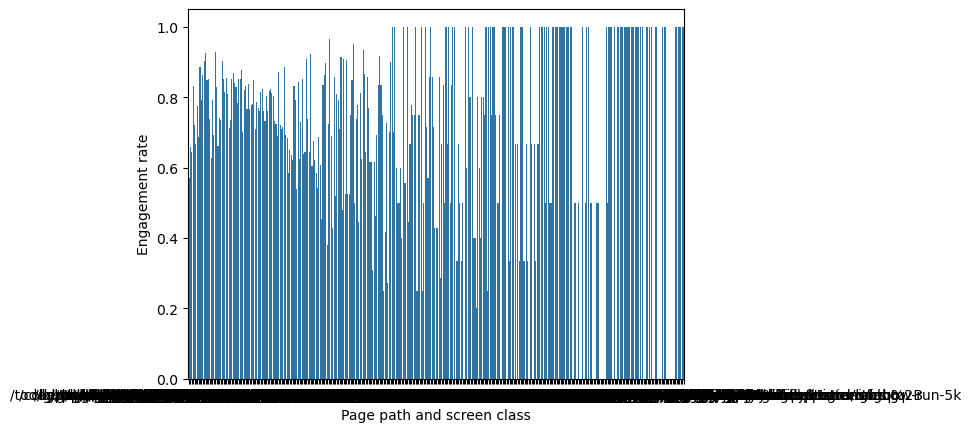

In [21]:
sns.barplot(se, x = 'Page path and screen class', y = 'Engagement rate')
plt.show()

Yikes. This graph is all over the place. Let's try URLs with engagement rates above 0.8 and see what that does.

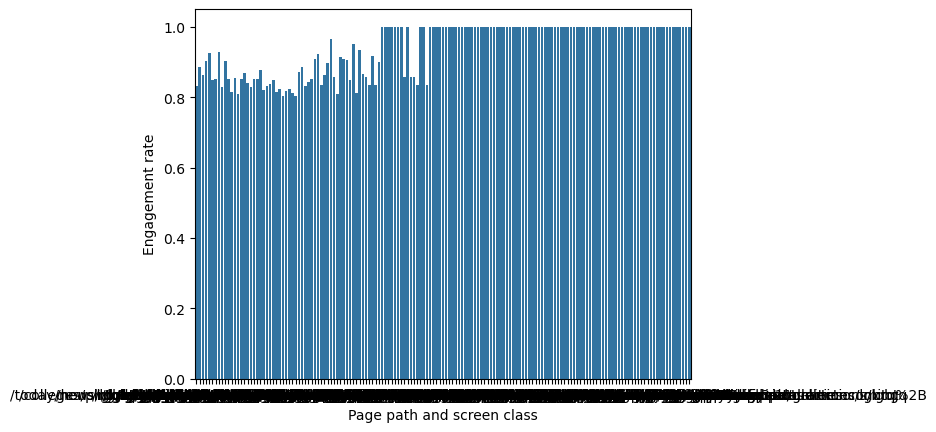

In [22]:
sns.barplot(se[se['Engagement rate'] > 0.8], x = 'Page path and screen class', y = 'Engagement rate')
plt.show()

Hmm. That doesn't look right. Or at least that is not what I was expecting to see. Let's investigate.

In [23]:
enr = se[se['Engagement rate'] > 0.8]
enr

,Page path and screen class,Sessions,Engaged sessions,Engagement rate,Average session duration
3,/lgbtq,4441,3687,0.830218,151.891271
8,/housing/lgbtq-living-learning-community,814,721,0.885749,103.146535
10,/colleges/ph/lgbtq-public-health-graduate-cert...,721,623,0.864078,119.902872
11,/lgbtq/center-staff,718,648,0.902507,102.982073
12,/lgbtq/lgbtq-programs-and-events,655,606,0.925191,70.618330
...,...,...,...,...,...
354,/lgbtq/whats-news,1,1,1.000000,10.390929
355,/people-and-culture/news/lgbtq-center-celebrat...,1,1,1.000000,20.569349
356,/special-collections-and-archives/search-speci...,1,1,1.000000,54.535266
357,/special-collections-and-archives/search-speci...,1,1,1.000000,85.666002


Ah. So there seem to be some URLs that have literally 1 engaged session, giving them a 1.0 engagement rate. It has occurred to me that this might be an issue where URLs with high engagement rates may be due to having such low sessions and/or engaged sessions to begin with. Maybe I should try looking at engagement rates for only the 14 URLs that have the highest engaged sessions.  

In [24]:
filter_se = se[se['Engaged sessions'] > 500]

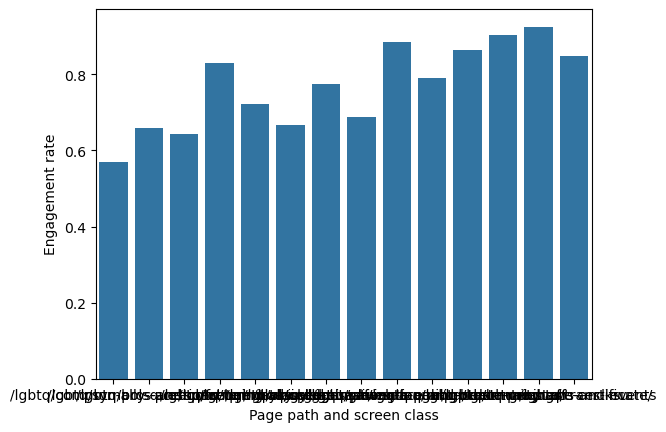

In [26]:
sns.barplot(filter_se, x = 'Page path and screen class', y = 'Engagement rate')
plt.show()

It looks like all 14 of these URLs have engagement rates above 0.5 (which I confirmed with the graph below that resulted in the exact same image), so that tells me each of these URLs are engaged with enough to still be potential candidates, and from here I could compare those with higher or lower engagement rates to narrow down reccommendations from here, though again I am not going to start making those conclusions at this point.

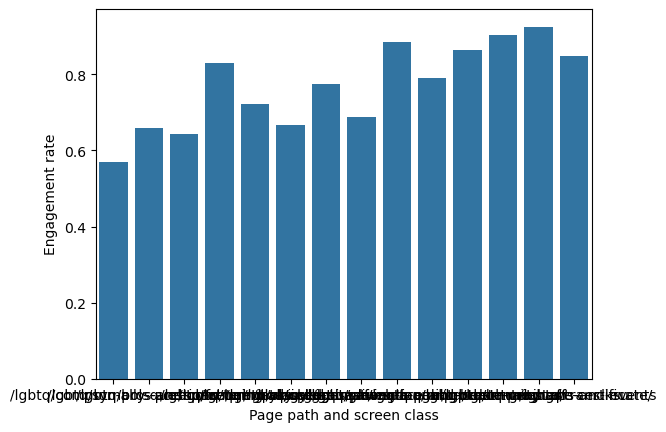

In [27]:
sns.barplot(filter_se[filter_se['Engagement rate'] > 0.5], x = 'Page path and screen class', y = 'Engagement rate')
plt.show()

Also I do recognize that these graphs are clearly not presentation ready, but again that is not a huge concern at this time. Before I make any final statements for this milestone, I have one more data file to explore.

### Menu Link Usage

The fifth and final data file I have involves menu link usage, which has to do with how the menu items/links in our website's navigation menus (header and footer menus) were used (e.g., how many times each link was clicked). This is the data file the Executive Director of Digital Communications sent to me directly from a site external from Google Analytics. Fortunately, this DataFrame also already appears tidy; each row/observation is a different link in one of our navigation menus (representated as an event), and the variables are different aspects/metrics of each link. 

In [29]:
menu = pd.read_csv('menu_link_usage.csv')
menu.head()

,Event name,Event Description,Click Text,Event count
0,navigation,Megamenu Links,Center Staff,225
1,navigation,Megamenu Links,About Us,206
2,navigation,Megamenu Links,Events and Programs,150
3,navigation,Megamenu Links,Student Resources,94
4,navigation,Megamenu Links,Contact Us,75


In [30]:
menu.shape

(30, 4)

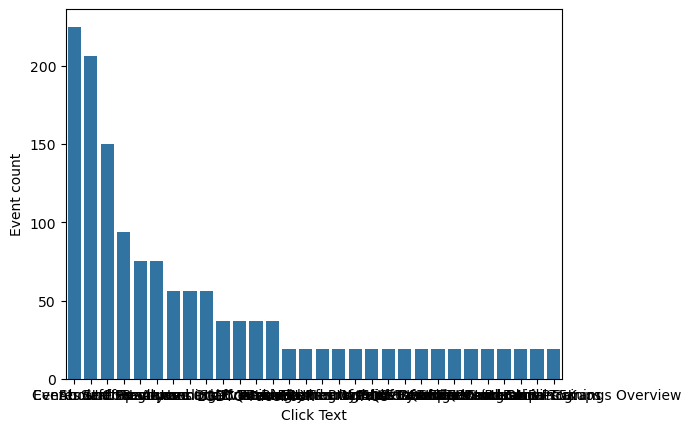

In [31]:
sns.barplot(menu, x = 'Click Text', y = 'Event count')
plt.show()

This graph definitely is not as initially horrible as some of the previous ones, though again the labels on the x-axis need dealt with, and I would want to change the x-axis title to "Menu Link Title" or something similar because "Click Text" is not super clear. 

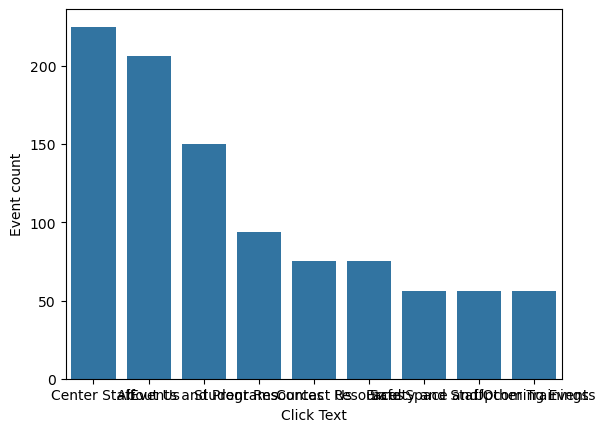

In [32]:
sns.barplot(menu[menu['Event count'] > 50], x = 'Click Text', y = 'Event count')
plt.show()

And there are 9 menu links that had more than 50 clicks over the one year timeframe, so I think it would make sense to consider those as having more potential than the rest of the menu links that have less than 50 clicks. However, I do not believe this data file would be the most relevant for my driving question becuase it just shows how many times a link within the navigations menu(s) has been clicked. However, users can view different pages of our website without using the navigation menu (such as googling a specific question and clicking on a result that takes them directly to the page of interest, without ever using the website's navigation). Additionally, not every page of our website has a link included in our main navigation menus (clearly, considering this data file only has 30 rows of observations). Therefore, while this tells us how our site's navigation was used, that does not provide the entire picture of content utilizaiton, unlike the scroll depth and sessions/engagement data files that provide specific URLs, and so I will not be pursuing this data file for the remainder of my project. 

### Final Thoughts on Milestone 1

Overall I believe continuing to work with the scroll depth data file and the sessions/engagement data file will provide the best insights for answering my driving question for this project. My next steps will be finalizing what story to tell through this data and how to do that with a data visualization. 